# **TF control analysis**

**Aim**：Explore whether there are key TF driving expression changes in multiple cancer species.

**Steps**：

1. **Obtain significantly expressed genes (DEG) in each cancer species**
    - DEGs corresponding to high and low MIR100HG groups
2. **Use TF–target Network（like TRRUST, ChEA3, gene_attribute_edges.txt）**
    - Identify which TFS control significant DEG；
    - Count TF occurrence frequency and control breadth；
3. **Find common TF**
    - Which TF expression differences are regulated in multiple cancer species；
    - Which TF are significantly correlated with MIR100HG expression levels.

In [5]:
import pandas as pd
import os

def analyze_tf_deg_links(deg_file_path, tf_target_file_path, output_prefix, output_dir="."):
    """
    Analysis of which TF regulate differentially expressed genes (DEGs) in a cancer species

    Parameters
    - deg_file_path: DEG file path，the 'HGNC_Symbol' column must be included
    - tf_target_file_path: TF–Target file path，the 'TF_Symbol' and 'HGNC_Symbol' column must included
    - output_prefix: Output file name prefix（such as "PAAD", "LUAD"）
    - output_dir: Output directory

    Output：
    - Save two CSV files：
        - {prefix}_TF_DEG_Mapping.csv：TF–DEG mapping
        - {prefix}_TF_DEG_Stats.csv：TF-DEG counting
    - Return the results：Statistical DataFrame
    """

    # === Step 1: read data ===
    deg_df = pd.read_csv(deg_file_path)
    tf_df = pd.read_csv(tf_target_file_path)

    # === Step 2: standardize gene ===
    deg_genes = set(deg_df['HGNC_Symbol'].str.upper())
    tf_df['HGNC_Symbol'] = tf_df['HGNC_Symbol'].str.upper()
    tf_df['TF_Symbol'] = tf_df['TF_Symbol'].str.upper()

    # === Step 3: Map TF–DEG ===
    tf_deg_links = tf_df[tf_df['HGNC_Symbol'].isin(deg_genes)]
    tf_deg_mapping = tf_deg_links[['TF_Symbol', 'HGNC_Symbol']].drop_duplicates()

    # === Step 4: Count the number of DEG controlled by each TF ===
    tf_counts = tf_deg_mapping['TF_Symbol'].value_counts().reset_index()
    tf_counts.columns = ['TF_Symbol', 'Num_DEGs_Controlled']

    # === Step 5: Output ===
    os.makedirs(output_dir, exist_ok=True)
    mapping_path = os.path.join(output_dir, f"{output_prefix}_TF_DEG_Mapping.csv")
    stats_path = os.path.join(output_dir, f"{output_prefix}_TF_DEG_Stats.csv")

    tf_deg_mapping.to_csv(mapping_path, index=False)
    tf_counts.to_csv(stats_path, index=False)

    print(f"Analysis successful：{output_prefix}")
    print(f"    ↪ TF–DEG mapping：{mapping_path}")
    print(f"    ↪ TF statistical results：{stats_path}")

    return tf_counts

cancers = ["PAAD", "LUAD", "PRAD", "SKCM", "STAD"]
base_path = r"D:\project data\M-28\NTU_Five_Cancers\DEG_Significant_Results"

for cancer in cancers:
    deg_path = f"{base_path}/{cancer}_DEG_Significant_Results.csv"
    analyze_tf_deg_links(
        deg_file_path = deg_path,
        tf_target_file_path = r"D:\project data\M-28\NTU_DATA_CLEANED\TF_Target.csv",
        output_prefix = cancer,
        output_dir = r"D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results"
    )



Analysis successful：PAAD
    ↪ TF–DEG mapping：D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\PAAD_TF_DEG_Mapping.csv
    ↪ TF statistical results：D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\PAAD_TF_DEG_Stats.csv
Analysis successful：LUAD
    ↪ TF–DEG mapping：D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\LUAD_TF_DEG_Mapping.csv
    ↪ TF statistical results：D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\LUAD_TF_DEG_Stats.csv
Analysis successful：PRAD
    ↪ TF–DEG mapping：D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\PRAD_TF_DEG_Mapping.csv
    ↪ TF statistical results：D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\PRAD_TF_DEG_Stats.csv
Analysis successful：SKCM
    ↪ TF–DEG mapping：D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\SKCM_TF_DEG_Mapping.csv
    ↪ TF statistical results：D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\SKCM_TF_DEG_Stats.csv
Analysis successful：STAD
    ↪ TF–DEG mapping：D:\project data\M-28\NTU_Five_Cancers\TF_DEG_R

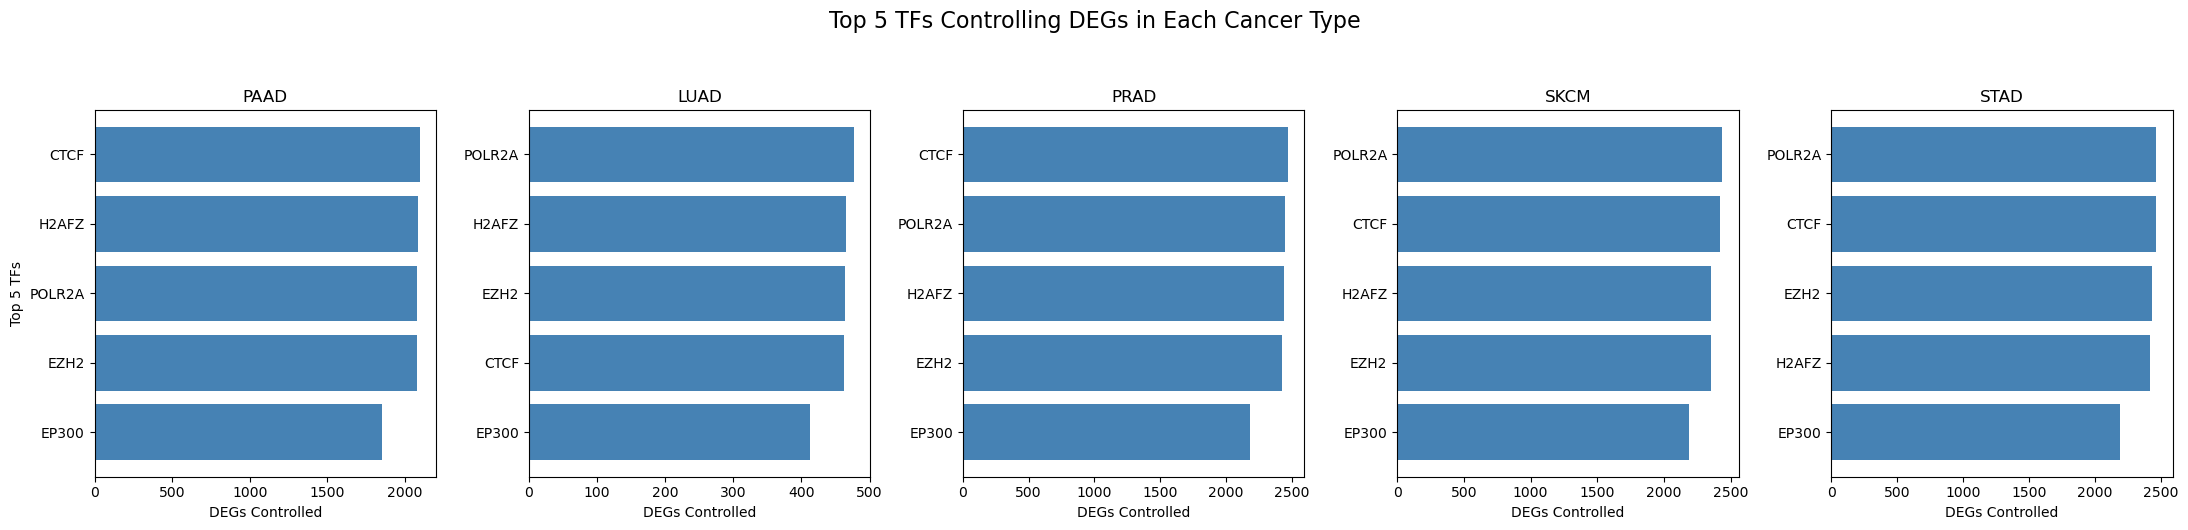

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the TF-DEG statistical results file for five cancer types
cancer_files = {
    "PAAD": r"D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\PAAD_TF_DEG_Stats.csv",
    "LUAD": r"D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\LUAD_TF_DEG_Stats.csv",
    "PRAD": r"D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\PRAD_TF_DEG_Stats.csv",
    "SKCM": r"D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\SKCM_TF_DEG_Stats.csv",
    "STAD": r"D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\STAD_TF_DEG_Stats.csv"
}

# Creat figures
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(22, 5), sharey=False)

for idx, (cancer, path) in enumerate(cancer_files.items()):
    df = pd.read_csv(path).head(5).sort_values(by="Num_DEGs_Controlled", ascending=True)
    axes[idx].barh(df['TF_Symbol'], df['Num_DEGs_Controlled'], color='steelblue')
    axes[idx].set_title(cancer)
    axes[idx].set_xlabel('DEGs Controlled')
    if idx == 0:
        axes[idx].set_ylabel('Top 5 TFs')

plt.tight_layout()
plt.suptitle('Top 5 TFs Controlling DEGs in Each Cancer Type', fontsize=16, y=1.05)
plt.subplots_adjust(top=0.85)
plt.savefig(r"D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\Top5_TFs_Barplot.png", dpi=300, bbox_inches='tight')
plt.show()


In [15]:
# Combine data
all_tf_stats = []
for cancer, path in cancer_files.items():
    df = pd.read_csv(path)
    df["Cancer"] = cancer
    all_tf_stats.append(df)

combined_df = pd.concat(all_tf_stats)

# The total TF regulation of all cancer types
tf_total_counts_full = combined_df.groupby("TF_Symbol")["Num_DEGs_Controlled"].sum().reset_index()
tf_total_counts_full = tf_total_counts_full.sort_values(by="Num_DEGs_Controlled", ascending=False).reset_index(drop=True)

tf_total_counts_full.head(10)

# output path
output_path = r"D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\TF_Total_DEG_Summary_All_Cancers.csv"

# save file
tf_total_counts_full.to_csv(output_path, index=False)

print(f"Successfully saved to:{output_path}")

Successfully saved to:D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\TF_Total_DEG_Summary_All_Cancers.csv


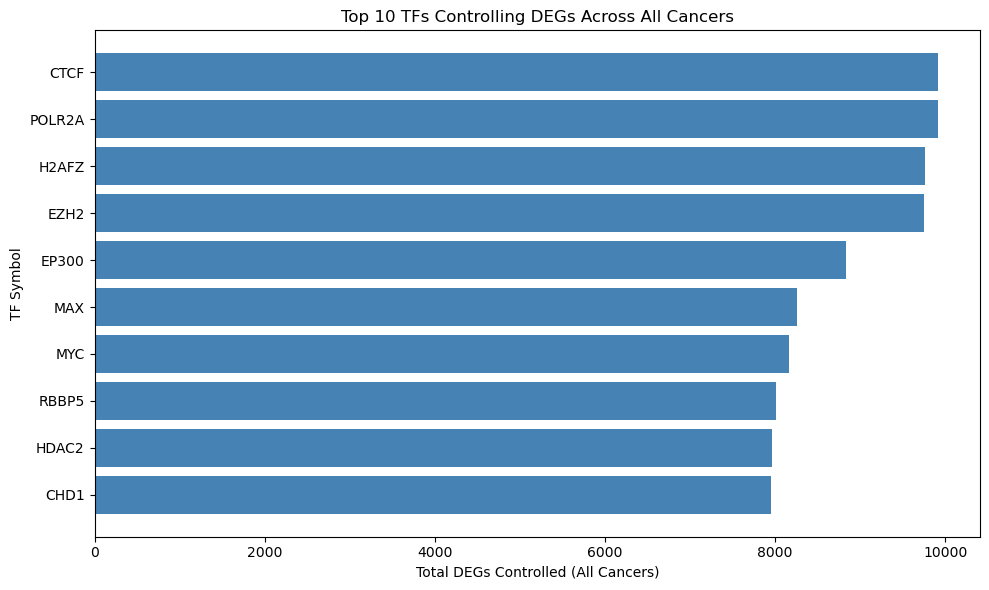

In [25]:
import matplotlib.pyplot as plt

# top10 TF
top10_tf_total = tf_total_counts_full.head(10)

# Draw a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10_tf_total["TF_Symbol"], top10_tf_total["Num_DEGs_Controlled"], color="steelblue")
plt.xlabel("Total DEGs Controlled (All Cancers)")
plt.ylabel("TF Symbol")
plt.title("Top 10 TFs Controlling DEGs Across All Cancers")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(r"D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\Top10_TFs_Barplot.png", dpi=300, bbox_inches='tight')
plt.show()


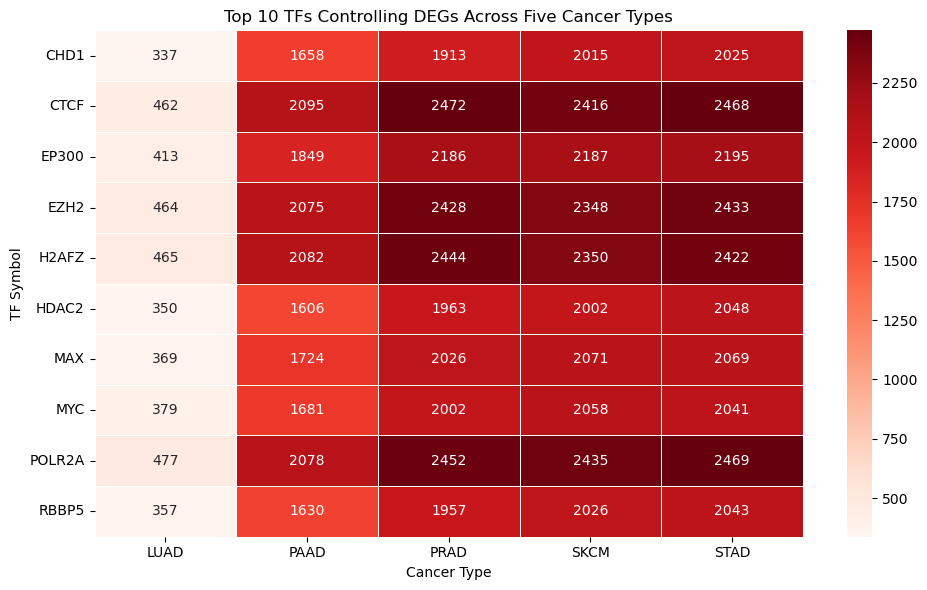

In [39]:
import seaborn as sns

all_tf_stats = []
for cancer, path in cancer_files.items():
    df = pd.read_csv(path)
    df["Cancer"] = cancer
    all_tf_stats.append(df)

combined_df = pd.concat(all_tf_stats)

# total Top10 TF
tf_total_counts = combined_df.groupby("TF_Symbol")["Num_DEGs_Controlled"].sum().reset_index()
top10_tfs = tf_total_counts.sort_values(by="Num_DEGs_Controlled", ascending=False).head(10)["TF_Symbol"].tolist()

# Build heat map matrix data
heatmap_data = combined_df[combined_df["TF_Symbol"].isin(top10_tfs)]
heatmap_matrix = heatmap_data.pivot_table(index="TF_Symbol", columns="Cancer", values="Num_DEGs_Controlled", fill_value=0)

# heat map
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_matrix, annot=True, fmt='.0f', cmap='Reds', linewidths=0.5)
plt.title("Top 10 TFs Controlling DEGs Across Five Cancer Types")
plt.xlabel("Cancer Type")
plt.ylabel("TF Symbol")
plt.tight_layout()
plt.savefig(r"D:\project data\M-28\NTU_Five_Cancers\TF_DEG_Results\Top10_TFs_Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()